# 1. Carga


### 1.1 Importación de Librerias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

#Manejo de expresiones regulares

import re

# Librerias de Natural Language Toolkit

import nltk
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
english_stopwords = stopwords.words('english')
import es_core_news_sm
nlp = es_core_news_sm.load()
import textblob
from textblob import TextBlob, Word, Blobber

#machine learning
from  sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from  sklearn.metrics import roc_auc_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JaimePuentesGomez\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


### 1.2 Lectura del Archivo de Kindle Reviews

A través de la librería **pandas** de realiza la carga de datos del archivo "kindle_reviews.csv"

In [4]:
#Lecura del archivo de datos

base = pd.read_csv("kindle_reviews.csv", na_filter=False)

In [5]:
# Dimensiones de los datos
print("La Base de Datos de Kindle Review ", base.shape[0], "filas y ", base.shape[1], "columnas")

La Base de Datos de Kindle Review  982619 filas y  10 columnas


In [6]:
# Muestra del Archivo de datos
df = base.sample(n=20000, random_state=1).copy()
# se arregla el index
df = df.reset_index(drop=True)

In [7]:
# Visualización muestra de datos
display(df.sample(5))

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
5522,60308,B004UWPNJM,"[0, 0]",5,This short story has just enough tension combi...,"02 8, 2014",A1MDRABUMA5NXY,Collie Cowhand. Unknown,Short sweet romance,1391817600
10731,264840,B008MZVR8E,"[0, 0]",5,"I have all of the Brie book, they are all wond...","09 8, 2012",A3ULOIAK6H0PBA,C.Sonnenburg,AWESOME,1347062400
12567,517196,B00CO73GA8,"[0, 0]",5,"I love the humour, craziness and crassness of ...","11 5, 2013",A7KN9TDDAE42S,Afrokiwi,Awesome book,1383609600
7686,348940,B00A50ZTPQ,"[0, 1]",4,I am glad that things have progressed and the ...,"01 14, 2013",A2P9WKMMFKDO3I,Seanette,AND IT GETS EVEN BETTER!,1358121600
4142,575011,B00DRERCRA,"[0, 0]",5,Cannot wait to read book 3!! I loved it from s...,"03 21, 2014",A3JNORDYBXNHH0,Amazon Customer,bravo!!,1395360000


# 2. Perfilamiento de Datos

In [8]:
#ProfileReport(df)
# Es normal que se detecte alta cardinalidad,  ya que son comentarios y los autoes de los comentarios son diferentes.

Perilamiento de datos, mostrando lineas de tiempo

In [9]:
base.dtypes

Unnamed: 0         int64
asin              object
helpful           object
overall            int64
reviewText        object
reviewTime        object
reviewerID        object
reviewerName      object
summary           object
unixReviewTime     int64
dtype: object

Cambio de datos a Date Time de la columna reviewTime        

In [10]:
base['reviewTime']= pd.to_datetime(base['reviewTime'])

In [11]:
base.dtypes

Unnamed: 0                 int64
asin                      object
helpful                   object
overall                    int64
reviewText                object
reviewTime        datetime64[ns]
reviewerID                object
reviewerName              object
summary                   object
unixReviewTime             int64
dtype: object

Creación de una columna año

In [12]:
base['Year'] = base['reviewTime'].dt.year

In [13]:
base.head(5)

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Year
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,2014-05-05,A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,2014
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,2014-01-06,AN0N05A9LIJEQ,critters,Different...,1388966400,2014
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,2014-04-04,A795DMNCJILA6,dot,Oldie,1396569600,2014
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,2014-02-19,A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,2014
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...",2014-03-19,A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,2014


In [14]:
base.Year.value_counts()

2013    420370
2014    410695
2012    120248
2011     26522
2010      3976
2009       512
2008       191
2007        39
2006        23
2005        18
2004        10
2000         8
2003         4
2001         2
2002         1
Name: Year, dtype: int64

In [15]:
# Visualización de reviews por año
#sns.catplot(data=base,x="Year", kind="count", height=5, aspect=3)
#plt.title("Reviews por Año", size=18)

In [16]:
# Visualización de calificaciones
#sns.catplot(data=base,x="overall", kind="count", height=5, aspect=3)
#plt.title("Clasificación de Calificaciones ( 1 - 5)", size=18)

# 3. Limpieza de Datos

Se establece 3 como valor Neutro y se elimina del Dat Set

In [17]:
df = df[df['overall'] != 3] # se filtra para que solo tenga resultados diferentes a 3. Se interpreta 3 como una calificación neutra.

df['Rated'] = np.where(df['overall'] > 3, 1, 0)

Verificación de NA

In [18]:
df.isna().sum()

Unnamed: 0        0
asin              0
helpful           0
overall           0
reviewText        0
reviewTime        0
reviewerID        0
reviewerName      0
summary           0
unixReviewTime    0
Rated             0
dtype: int64

# 4. Procesamiento de Texto

Funcion para Eliminar caracteres especiales

In [19]:
def cleaner(word):
    list_word_clean = []
    
#    word = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', '', word, flags=re.MULTILINE) # remover URL, remueve numeros, 
                                                                                                                                                    #remueve caracteres como @, $, #, &
    word = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', "", word)  # remover puntuacion
    word = re.sub(r'\#\.', '', word) #quitar numerales
    word = re.sub(r'\n', '', word) #remover espacios aparte
    word = re.sub(r',', '', word) # quitar comas
    word = re.sub(r'\-', ' ', word) # quitar slash
    word = re.sub(r'\.{3}', ' ', word) # quitar 3 puntos
    word = re.sub(r'a{2,}', 'a', word) # quitar 2 a's seguidas
    word = re.sub(r'é{2,}', 'é', word) # 
    word = re.sub(r'i{2,}', 'i', word)
    word = re.sub(r'ja{2,}', 'ja', word) 
    word = re.sub(r'á', 'a', word) # pasar todas las vocales con tilde a vocales sin tilde
    word = re.sub(r'é', 'e', word)
    word = re.sub(r'í', 'i', word)
    word = re.sub(r'ó', 'o', word)
    word = re.sub(r'ú', 'u', word)  
    word = re.sub('[^a-zA-Z]', ' ', word) # reemplazar todas las letras que contengan caracteres especiales
    word = re.sub(r'[^\w\s]', '', str(word).lower().strip()) # pasar a minusculas
    word  =  re.sub(' +', ' ', word) # me quita espacios adicionales
    word  = word.strip() # 
    word  =  re.sub('\r', '', word) # conservar todas las palabras
    
    

    for w1 in word.split(" "):
      if  w1.lower() not in english_stopwords:
        list_word_clean.append(w1.lower())
    
    out_text = " ".join(list_word_clean)
    
    return word,out_text, list_word_clean

Basado en la función Cleaner se crean 3 columnas: texto tratado, texto sin stopwords, texto tokens

In [20]:
aa = []
bb = []
cc = []
for i in df.iloc[:,4]:
    aa.append(cleaner(i)[0])
    bb.append(cleaner(i)[1])
    cc.append(cleaner(i)[2])

df['texto_tratado'] = aa
df['texto_sin_stopwords'] = bb
df['texto_tokens'] = cc


In [21]:
df

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Rated,texto_tratado,texto_sin_stopwords,texto_tokens
0,751188,B00H6TM1MI,"[5, 5]",5,I loved this novel! Elyse Salpeter has a mind ...,"01 17, 2014",A10QPT1QQKXEH5,Gwen P. Choate,AN ADVENTURE TO REMEMBER,1389916800,1,i loved this novel elyse salpeter has a mind f...,loved novel elyse salpeter mind filled magic a...,"[loved, novel, elyse, salpeter, mind, filled, ..."
1,811076,B00I5LA4UW,"[1, 1]",5,I read the first book in &#8220;The Bristol Co...,"05 30, 2014",ALWA9UDP2BCP4,ScuttlebuttReviews,"a love story with quirks to make it different,...",1401408000,1,i read the first book in the bristol collectio...,read first book bristol collection junk last y...,"[read, first, book, bristol, collection, junk,..."
3,831713,B00IH487I8,"[0, 0]",5,The third of the Fae Chronicles... You must re...,"05 3, 2014",A1WPGA0G4CA0RH,Ann D.,The Fae Chronicles Rock,1399075200,1,the third of the fae chronicles you must read ...,third fae chronicles must read first two under...,"[third, fae, chronicles, must, read, first, tw..."
4,87446,B005BXU0BA,"[0, 0]",5,THIS BOOK LITERALLY PUT TEARS IN MY EYES. Jade...,"01 31, 2013",A20BUMEC3IC3SV,Kosha Jordan,OMG,1359590400,1,this book literally put tears in my eyes jade ...,book literally put tears eyes jade f ed upped ...,"[book, literally, put, tears, eyes, jade, f, e..."
5,173429,B0073VIZB0,"[0, 0]",4,I knew this was part of a series yet i have to...,"04 16, 2014",A1OVFZ8CHH285D,MVO,great opening,1397606400,1,i knew this was part of a series yet i have to...,knew part series yet say complete without clif...,"[knew, part, series, yet, say, complete, witho..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,841551,B00IMOHIQ0,"[1, 1]",5,Defiant Dragon carries on the way that I expec...,"03 3, 2014",A3KBXA47IC49FW,Kimmy T,This is why I'm a fan!,1393804800,1,defiant dragon carries on the way that i expec...,defiant dragon carries way expect kassanna boo...,"[defiant, dragon, carries, way, expect, kassan..."
19996,385376,B00AQBDRFI,"[1, 2]",5,"Okay, I know this was a book was for a sexual ...","03 17, 2013",A2YOAV9HC8HNMB,"Amazon Customer ""&#34;Reader&#34;""",Crazy For Milk,1363478400,1,okay i know this was a book was for a sexual c...,okay know book sexual charge honestly book rea...,"[okay, know, book, sexual, charge, honestly, b..."
19997,73614,B005201LGK,"[0, 0]",5,I have been reading these books and love them ...,"04 25, 2012",A1CEGMSGVVDH19,Maria Hall,teys wolf,1335312000,1,i have been reading these books and love them ...,reading books love like reread say lot books k...,"[reading, books, love, like, reread, say, lot,..."
19998,364929,B00AFF9AXS,"[0, 0]",4,For the price it was a great deal. My kid read...,"11 12, 2013",ARIDN94LOCQFD,Steve Taylor,Fun Book on Animals,1384214400,1,for the price it was a great deal my kid read ...,price great deal kid read lot outload intersti...,"[price, great, deal, kid, read, lot, outload, ..."


Analisis de Sentimiento, utilizando la libreria TextBlob y los conceptos de polaridad y subjetividad:

Polaridad hace referencia a cómo positivo o negativo el tono de las tasas de texto de entrada de -1 a + 1, por -1 son más negativo y + 1 está más positiva. 

Subjetividad hace referencia a cómo subjetiva las tasas de instrucción de 0 a 1, siendo 1 el alta subjetiva. 

In [22]:
sentim = []


for i in df.iloc[:,12]: # analisis de sentimiento para la columna 12 (texto tratado)
    sentim.append(TextBlob(i).sentiment)

In [23]:
polarity = []
subjectivity = []

for i in df.iloc[:,12]:
    polarity.append(TextBlob(i).sentiment[0])
    subjectivity.append(TextBlob(i).sentiment[1])

df['polarity'] = polarity
df['subjectivity'] = subjectivity


In [24]:
df

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Rated,texto_tratado,texto_sin_stopwords,texto_tokens,polarity,subjectivity
0,751188,B00H6TM1MI,"[5, 5]",5,I loved this novel! Elyse Salpeter has a mind ...,"01 17, 2014",A10QPT1QQKXEH5,Gwen P. Choate,AN ADVENTURE TO REMEMBER,1389916800,1,i loved this novel elyse salpeter has a mind f...,loved novel elyse salpeter mind filled magic a...,"[loved, novel, elyse, salpeter, mind, filled, ...",0.540000,0.820000
1,811076,B00I5LA4UW,"[1, 1]",5,I read the first book in &#8220;The Bristol Co...,"05 30, 2014",ALWA9UDP2BCP4,ScuttlebuttReviews,"a love story with quirks to make it different,...",1401408000,1,i read the first book in the bristol collectio...,read first book bristol collection junk last y...,"[read, first, book, bristol, collection, junk,...",0.377727,0.581535
3,831713,B00IH487I8,"[0, 0]",5,The third of the Fae Chronicles... You must re...,"05 3, 2014",A1WPGA0G4CA0RH,Ann D.,The Fae Chronicles Rock,1399075200,1,the third of the fae chronicles you must read ...,third fae chronicles must read first two under...,"[third, fae, chronicles, must, read, first, tw...",0.335714,0.304762
4,87446,B005BXU0BA,"[0, 0]",5,THIS BOOK LITERALLY PUT TEARS IN MY EYES. Jade...,"01 31, 2013",A20BUMEC3IC3SV,Kosha Jordan,OMG,1359590400,1,this book literally put tears in my eyes jade ...,book literally put tears eyes jade f ed upped ...,"[book, literally, put, tears, eyes, jade, f, e...",-0.125000,0.591667
5,173429,B0073VIZB0,"[0, 0]",4,I knew this was part of a series yet i have to...,"04 16, 2014",A1OVFZ8CHH285D,MVO,great opening,1397606400,1,i knew this was part of a series yet i have to...,knew part series yet say complete without clif...,"[knew, part, series, yet, say, complete, witho...",0.291667,0.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,841551,B00IMOHIQ0,"[1, 1]",5,Defiant Dragon carries on the way that I expec...,"03 3, 2014",A3KBXA47IC49FW,Kimmy T,This is why I'm a fan!,1393804800,1,defiant dragon carries on the way that i expec...,defiant dragon carries way expect kassanna boo...,"[defiant, dragon, carries, way, expect, kassan...",0.167003,0.587542
19996,385376,B00AQBDRFI,"[1, 2]",5,"Okay, I know this was a book was for a sexual ...","03 17, 2013",A2YOAV9HC8HNMB,"Amazon Customer ""&#34;Reader&#34;""",Crazy For Milk,1363478400,1,okay i know this was a book was for a sexual c...,okay know book sexual charge honestly book rea...,"[okay, know, book, sexual, charge, honestly, b...",0.347521,0.633150
19997,73614,B005201LGK,"[0, 0]",5,I have been reading these books and love them ...,"04 25, 2012",A1CEGMSGVVDH19,Maria Hall,teys wolf,1335312000,1,i have been reading these books and love them ...,reading books love like reread say lot books k...,"[reading, books, love, like, reread, say, lot,...",0.600000,0.600000
19998,364929,B00AFF9AXS,"[0, 0]",4,For the price it was a great deal. My kid read...,"11 12, 2013",ARIDN94LOCQFD,Steve Taylor,Fun Book on Animals,1384214400,1,for the price it was a great deal my kid read ...,price great deal kid read lot outload intersti...,"[price, great, deal, kid, read, lot, outload, ...",0.658333,0.770833


Retiro de Valores de Polaridad Neutros

In [25]:
# se retiran los valores neutros
df2 = df[(df['polarity'] > 0.1) | (df['polarity'] < -0.1)]
df2 = df2.reset_index(drop = True)


In [26]:
df2['Polaridad'] = np.where(df2['polarity'] >= 0.1, 1, 0)

In [27]:
df2

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Rated,texto_tratado,texto_sin_stopwords,texto_tokens,polarity,subjectivity,Polaridad
0,751188,B00H6TM1MI,"[5, 5]",5,I loved this novel! Elyse Salpeter has a mind ...,"01 17, 2014",A10QPT1QQKXEH5,Gwen P. Choate,AN ADVENTURE TO REMEMBER,1389916800,1,i loved this novel elyse salpeter has a mind f...,loved novel elyse salpeter mind filled magic a...,"[loved, novel, elyse, salpeter, mind, filled, ...",0.540000,0.820000,1
1,811076,B00I5LA4UW,"[1, 1]",5,I read the first book in &#8220;The Bristol Co...,"05 30, 2014",ALWA9UDP2BCP4,ScuttlebuttReviews,"a love story with quirks to make it different,...",1401408000,1,i read the first book in the bristol collectio...,read first book bristol collection junk last y...,"[read, first, book, bristol, collection, junk,...",0.377727,0.581535,1
2,831713,B00IH487I8,"[0, 0]",5,The third of the Fae Chronicles... You must re...,"05 3, 2014",A1WPGA0G4CA0RH,Ann D.,The Fae Chronicles Rock,1399075200,1,the third of the fae chronicles you must read ...,third fae chronicles must read first two under...,"[third, fae, chronicles, must, read, first, tw...",0.335714,0.304762,1
3,87446,B005BXU0BA,"[0, 0]",5,THIS BOOK LITERALLY PUT TEARS IN MY EYES. Jade...,"01 31, 2013",A20BUMEC3IC3SV,Kosha Jordan,OMG,1359590400,1,this book literally put tears in my eyes jade ...,book literally put tears eyes jade f ed upped ...,"[book, literally, put, tears, eyes, jade, f, e...",-0.125000,0.591667,0
4,173429,B0073VIZB0,"[0, 0]",4,I knew this was part of a series yet i have to...,"04 16, 2014",A1OVFZ8CHH285D,MVO,great opening,1397606400,1,i knew this was part of a series yet i have to...,knew part series yet say complete without clif...,"[knew, part, series, yet, say, complete, witho...",0.291667,0.533333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15377,682451,B00FUBT7S0,"[1, 1]",5,I was cheering on the side lines of this story...,"03 7, 2014",A1Q0ZPKJY5XUQ3,cara@2ndglance,"Short, To The Point",1394150400,1,i was cheering on the side lines of this story...,cheering side lines story pages begging story ...,"[cheering, side, lines, story, pages, begging,...",0.314461,0.548529,1
15378,841551,B00IMOHIQ0,"[1, 1]",5,Defiant Dragon carries on the way that I expec...,"03 3, 2014",A3KBXA47IC49FW,Kimmy T,This is why I'm a fan!,1393804800,1,defiant dragon carries on the way that i expec...,defiant dragon carries way expect kassanna boo...,"[defiant, dragon, carries, way, expect, kassan...",0.167003,0.587542,1
15379,385376,B00AQBDRFI,"[1, 2]",5,"Okay, I know this was a book was for a sexual ...","03 17, 2013",A2YOAV9HC8HNMB,"Amazon Customer ""&#34;Reader&#34;""",Crazy For Milk,1363478400,1,okay i know this was a book was for a sexual c...,okay know book sexual charge honestly book rea...,"[okay, know, book, sexual, charge, honestly, b...",0.347521,0.633150,1
15380,73614,B005201LGK,"[0, 0]",5,I have been reading these books and love them ...,"04 25, 2012",A1CEGMSGVVDH19,Maria Hall,teys wolf,1335312000,1,i have been reading these books and love them ...,reading books love like reread say lot books k...,"[reading, books, love, like, reread, say, lot,...",0.600000,0.600000,1


# 5. Naive Bayes

In [102]:
df2['Polaridad'].value_counts()

1    14886
0      496
Name: Polaridad, dtype: int64

In [103]:
# se trae los conjuntos de text y trian 
from  sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2['texto_sin_stopwords'],df2['Polaridad'], random_state=0)


In [105]:
vect = CountVectorizer().fit(X_train)
X_train_vectorized = vect.transform(X_train)

vect = CountVectorizer().fit(X_test)
X_test2_vectorized = vect.transform(X_test)

In [93]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
print('Training Accuracy: {:.2f}'.format(model.score(X_train_vectorized, y_train)))
#print('Testing Accuracy: {:.2f}'.format(model.score(X_test_vectorized, y_test)))

Training Accuracy: 0.97


In [94]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(vect.transform(X_train), y_train)

In [95]:
from sklearn.model_selection import cross_val_score

best_alpha = 0
best_min_df = 0
best_score = 0

alphas = [.1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

for alpha in alphas:
    for m_df in min_dfs:
        tfidf = CountVectorizer(min_df = m_df)
        nb = MultinomialNB(alpha = alpha)
        score = np.mean(cross_val_score(nb, X_res, y_res, scoring = 'accuracy', cv = 3))
        if score > best_score:
            best_score = score
            best_alpha = alpha
            best_min_df = m_df
            
print('Best_score: {:.2f}'.format(best_score))
print('Best_alpha: {:.2f}'.format(best_alpha))
print('Best_min_df: {:.5f}'.format(best_min_df))

Best_score: 0.95
Best_alpha: 0.10
Best_min_df: 0.00001


In [96]:
cv = CountVectorizer(min_df = .001)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = .2, random_state = 42)

In [98]:
model = MultinomialNB(alpha = 0.1)
model.fit(X_train, y_train)
naive_pred = model.predict(X_test)
naive_prob = model.predict_proba(X_test)[:,1]

In [99]:
print('Training Accuracy : {:.2f}'.format(model.score(X_train, y_train)))
print('Testing Accuracy: {:.2f}'.format(model.score(X_test, y_test)))
print('\n Confusion matrix:')
print(confusion_matrix(y_test, naive_pred))
print('\n Classification Report: ')
print(classification_report(y_test, naive_pred))

Training Accuracy : 0.99
Testing Accuracy: 0.97

 Confusion matrix:
[[2150   83]
 [  37 2200]]

 Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2233
           1       0.96      0.98      0.97      2237

    accuracy                           0.97      4470
   macro avg       0.97      0.97      0.97      4470
weighted avg       0.97      0.97      0.97      4470



In [109]:
model = MultinomialNB(alpha = 0.1)
model.fit(X_test2_vectorized, y_test)
naive_pred = model.predict(X_test2_vectorized)
naive_prob = model.predict_proba(X_test2_vectorized)[:,1]

In [112]:
print('Test  Accuracy: {:.2f}'.format(model.score(X_test2_vectorized, y_test)))
print('\n Confusion matrix:')
print(confusion_matrix(y_test, naive_pred))
print('\n Classification Report: ')
print(classification_report(y_test, naive_pred))

Test  Accuracy: 1.00

 Confusion matrix:
[[ 118   16]
 [   0 3712]]

 Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       134
           1       1.00      1.00      1.00      3712

    accuracy                           1.00      3846
   macro avg       1.00      0.94      0.97      3846
weighted avg       1.00      1.00      1.00      3846



In [115]:
#Score utilizando la curva ROC
print('AUC: ', roc_auc_score(y_test, naive_pred))

AUC:  0.9402985074626865


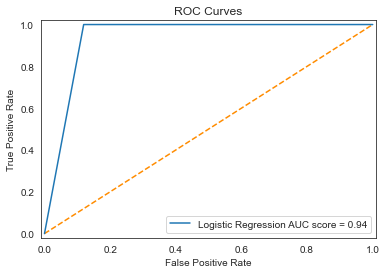

In [118]:
sns.set_style('white')
fig, ax = plt.subplots()
ax.plot([0,1], [0,1], linestyle = '--', color = 'darkorange')

probs = [naive_pred]
labels = ['Logistic Regression']
for idx in range(len(probs)):
    fpr, tpr, thresholds = roc_curve(y_test, probs[idx])
    ax.plot(fpr, tpr, label = (labels[idx] + ' AUC score = %.2f' % roc_auc_score(y_test, probs[idx])))
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
ax.legend(loc = 'lower right')
ax.margins(x = 0.01, y =0.02)
plt.show()